In [1]:
# Multilayer Perceptron to Predict Climate in Indian Cities (t+1, given t, t-1, t-2)
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)

In [3]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [4]:
# fix random seed
np.random.seed(7)
# load the dataset
df_full = pd.read_csv('../output/IndianTemperatureDatawithAltitude02.csv')
df_full

,Unnamed: 0,year,month,AverageTemperature,City,Country,Latitude,Longitude,Altitude
0,0,1901,1,18.203,Ahmadabad,India,23.31,72.52,66
1,1,1901,2,19.746,Ahmadabad,India,23.31,72.52,66
2,2,1901,3,27.243,Ahmadabad,India,23.31,72.52,66
3,3,1901,4,30.819,Ahmadabad,India,23.31,72.52,66
4,4,1901,5,33.300,Ahmadabad,India,23.31,72.52,66
5,5,1901,6,32.750,Ahmadabad,India,23.31,72.52,66
6,6,1901,7,29.667,Ahmadabad,India,23.31,72.52,66
7,7,1901,8,27.273,Ahmadabad,India,23.31,72.52,66
8,8,1901,9,28.227,Ahmadabad,India,23.31,72.52,66
9,9,1901,10,28.424,Ahmadabad,India,23.31,72.52,66


In [9]:
city_temp=df_full[df_full['City']=='Bombay']

city_temp

,Unnamed: 0,year,month,AverageTemperature,City,Country,Latitude,Longitude,Altitude
2704,2704,1901,1,23.870,Bombay,India,18.48,72.68,12
2705,2705,1901,2,22.899,Bombay,India,18.48,72.68,12
2706,2706,1901,3,26.263,Bombay,India,18.48,72.68,12
2707,2707,1901,4,27.854,Bombay,India,18.48,72.68,12
2708,2708,1901,5,29.054,Bombay,India,18.48,72.68,12
2709,2709,1901,6,28.354,Bombay,India,18.48,72.68,12
2710,2710,1901,7,27.166,Bombay,India,18.48,72.68,12
2711,2711,1901,8,26.522,Bombay,India,18.48,72.68,12
2712,2712,1901,9,27.262,Bombay,India,18.48,72.68,12
2713,2713,1901,10,27.998,Bombay,India,18.48,72.68,12


In [10]:
graph=city_temp[city_temp['year']>1900]

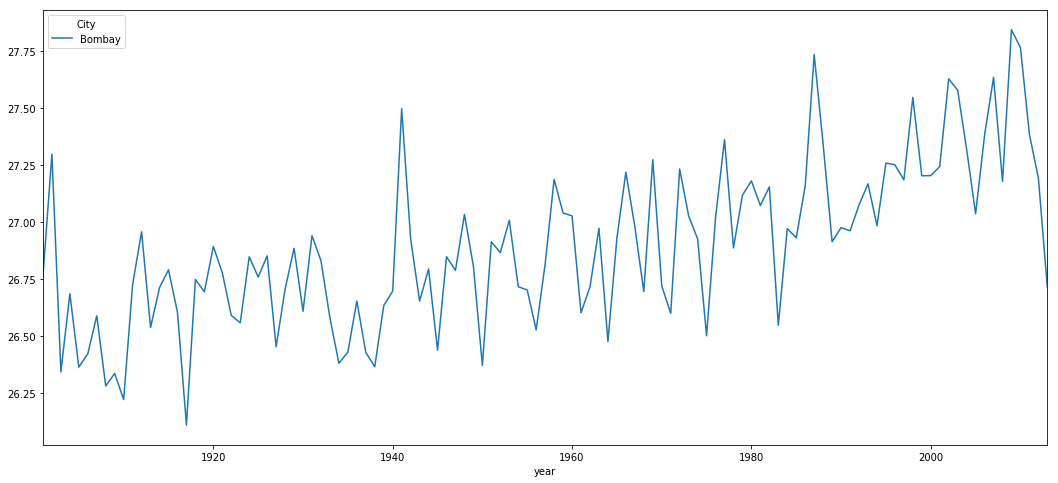

In [11]:
graph=graph.groupby(['City','year'])['AverageTemperature'].mean().reset_index()
graph=graph.pivot('year','City','AverageTemperature').fillna(0)
graph.plot()
fig=plt.gcf()
fig.set_size_inches(18,8)

In [41]:
dataframe = city_temp.loc[city_temp['year']>1900,['AverageTemperature']]
dataframe.head(5)

,AverageTemperature
2704,23.870
2705,22.899
2706,26.263
2707,27.854
2708,29.054


In [42]:
dataset = dataframe.values
dataset = dataset.astype('float32')
print(dataset.shape)
type(dataset)

(1352, 1)


numpy.ndarray

In [43]:
dataset[0:5]

array([[ 23.87000084],
       [ 22.89900017],
       [ 26.26300049],
       [ 27.85400009],
       [ 29.05400085]], dtype=float32)

In [44]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size

In [45]:
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

# create and fit Multilayer Perceptron model  

[Keras MLP Documentation](https://keras.io/getting-started/sequential-model-guide/)

We will use the relu activation function with a look-back window of 3 prior time steps. For performance metric, we'll use the mean squared error.

In [46]:
# reshape dataset
look_back = 3 # forecast based on the last three time steps
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [47]:
# create and fit Multilayer Perceptron model
# https://keras.io/getting-started/sequential-model-guide/
model = Sequential()
model.add(Dense(12, input_dim=look_back, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=400, batch_size=2, verbose=2)

Epoch 1/400
2s - loss: 172.6987
Epoch 2/400
1s - loss: 3.5079
Epoch 3/400
1s - loss: 3.4769
Epoch 4/400
1s - loss: 3.4718
Epoch 5/400
1s - loss: 3.4430
Epoch 6/400
1s - loss: 3.3805
Epoch 7/400
1s - loss: 3.3414
Epoch 8/400
2s - loss: 3.2954
Epoch 9/400
1s - loss: 3.2504
Epoch 10/400
1s - loss: 3.1814
Epoch 11/400
1s - loss: 3.1299
Epoch 12/400
2s - loss: 3.0787
Epoch 13/400
1s - loss: 3.0011
Epoch 14/400
2s - loss: 2.9594
Epoch 15/400
1s - loss: 2.8997
Epoch 16/400
2s - loss: 2.8125
Epoch 17/400
2s - loss: 2.8120
Epoch 18/400
2s - loss: 2.7216
Epoch 19/400
2s - loss: 2.6036
Epoch 20/400
1s - loss: 2.6073
Epoch 21/400
2s - loss: 2.5854
Epoch 22/400
1s - loss: 2.5611
Epoch 23/400
1s - loss: 2.4702
Epoch 24/400
1s - loss: 2.4421
Epoch 25/400
1s - loss: 2.3768
Epoch 26/400
1s - loss: 2.3090
Epoch 27/400
1s - loss: 2.3364
Epoch 28/400
1s - loss: 2.2664
Epoch 29/400
1s - loss: 2.2299
Epoch 30/400
1s - loss: 2.1974
Epoch 31/400
1s - loss: 2.1219
Epoch 32/400
1s - loss: 2.1226
Epoch 33/400
1s

In [48]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 1.01 MSE (1.00 RMSE)
Test Score: 0.89 MSE (0.95 RMSE)


In [49]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [58]:
print(trainPredict.shape)
print(testPredict.shape)
testPredict[0:5]

(901, 1)
(443, 1)


array([[ 26.78081131],
       [ 27.21473122],
       [ 29.45602989],
       [ 28.30597496],
       [ 25.85809326]], dtype=float32)

In [51]:
# match the numbering of the three data series for plotting
# the three series (original, train, and test) have the same number of rows as the original dataset
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

In [81]:
# pick a small subset to plot it
dataset1=dataset[850:950]
trainPredictPlot1 = trainPredictPlot[850:950]
testPredictPlot1 = testPredictPlot[850:950]

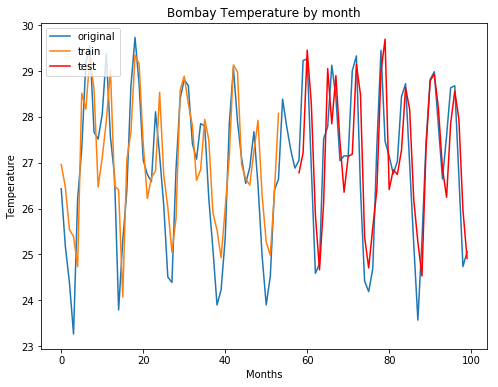

In [82]:
# plot baseline and predictions
plt.figure(figsize=(8,6))
plt.plot(dataset1,label='original')
plt.plot(trainPredictPlot1,label='train')
plt.plot(testPredictPlot1,color='red',label='test')
plt.legend(loc='upper left')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.title('Bombay Temperature by month')
plt.savefig('BombayTemperatureMLP.png')

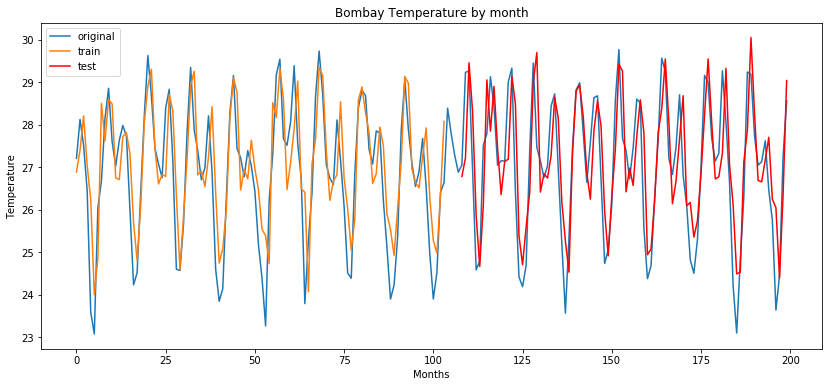

In [83]:
# pick a small subset to plot it
dataset2=dataset[800:1000]
trainPredictPlot2 = trainPredictPlot[800:1000]
testPredictPlot2= testPredictPlot[800:1000]

# plot baseline and predictions
plt.figure(figsize=(14,6))
plt.plot(dataset2,label='original')
plt.plot(trainPredictPlot2,label='train')
plt.plot(testPredictPlot2,color='red',label='test')
plt.legend(loc='upper left')
plt.xlabel('Months')
plt.ylabel('Temperature')
plt.title('Bombay Temperature by month')
plt.savefig('BombayTemperatureMLP_200.png')